In [1]:
# 145-180

## 03. 평가

머신러닝은 데이터 가공/변환, 모델 학습/예측, 평가의 프로세스로 구성
* 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있다.
* 성능 평가 지표는 모델이 분류냐 회귀냐에 따라 종류가 나뉨
* 회귀 : 실제값과 예측값의 오차 평균값에 기인
* 분류 : 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반

분류의 성능 평가 지표
* 정확도
* 오차행렬
* 정밀도
* 재현율
* F1 스코어
* ROC AUC

결정 클래스 값 종류
* 이진 분류 : 긍정/부정과 같은 2개의 결괏값만을 가짐 ( 분류의 성능 평가 지표는 이진 분류에서 더욱 중요하게 강조되는 지표임 )
* 멀티 분류 : 여러 개의 결정 클래스 값을 가짐

### [01] 정확도

정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표, 직관적으로 모델 예측 성능을 나타내는 평가 지표

정확도 = $ \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $



사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성함.

In [2]:
# MyDummyClassifier() 생성

import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator) :
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None) :
        pass
    # predict() 메서는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X) :
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis =1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:4f}'. format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.787709


<ipython-input-5-ad8501a4b3e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)
<ipython-input-5-ad8501a4b3e3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

불균형한 데이터 세트
* 불균형한 데이터 세트에 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 매우 높은 정확도
* 데이터 분포도가 균일하지 않은 경우 무조건 특정한 결과로 찍어도 높은 쉬치가 나타날 수 있음

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 불균형한 데이터 세트와 Dummy Classifier 생성

class MyFakeClassifier(BaseEstimator) :
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X) :
        return np.zeros ( (len(X), 1), dtype = bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'. format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 됨.

정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용하여 ML 모델 성능을 평가해야 함

### [02] 오차 행렬

오차행렬(confusion matrix)
* 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
* 이진 분류의 예측 오류가 얼마인지, 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
* True/False, Positive/Negative의 4분면으로 구성됨.
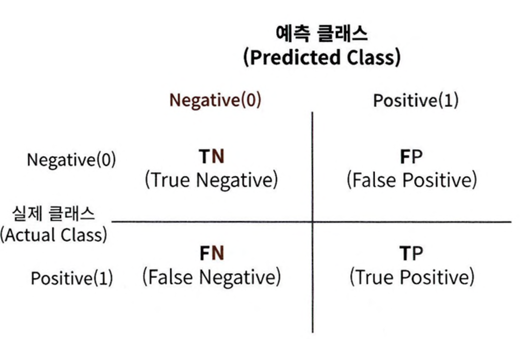


* TN : 예측값은 Negative 값 0으로 예측, 실제 값 역시 Negative 값 0
* FP : 예측값은 Positive 값 1으로 예측, 실제 값 역시 Negative 값 0
* FN : 예측값은 Negative 값 0으로 예측, 실제 값 역시 Positive 값 1
* TP : 예측값은 Positive 값 1으로 예측, 실제 값 역시 Positive 값 1

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

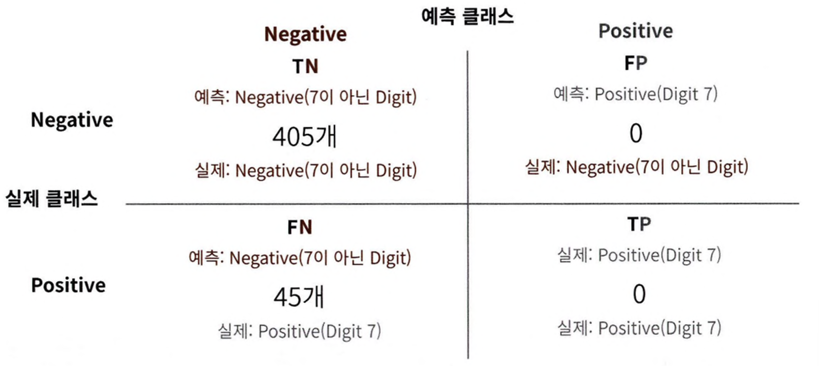

정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP) / (TN + FP + FN + TP)

정확도 지표는 비대칭한 데이터 세트에서 Positive 에 대한 예측 정확도를 판단하지 못한 채 Negative 에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됩니다.

### [03] 정밀도와 재현율
* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)

정밀도 : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
* FP + TP : 예측을 Positive로 한 모든 데이터 건수
* TP : 예측과 실제 값이 Positive로 일치한 데이터 건수
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도

재현율 : 실제 값이 Positive 인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
* FN + TP : 실제 값이 Positive인 모든 데이터 건수
* TP : 예측과 실제 값이 Positive로 일치한 데이터 건수
* 민감도 또는 TPR (True Positive Rate)

재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative 로 잘못 판단하게 되면 업무상 큰 영향이 발생
* 재현율이 상대적으로 더 중요한 지표인 경우 : 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생
* 정밀도가 상대적으로 더 중요한 지표인 경우 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생

재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용
* 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞춤
* 재현율은 FN(실제 Positive, 예측 Negative)을 낮추는 데 초점을 맞춤
* 정밀도는 FP을 낮추는 데 초점을 맞춤
* 재현율과 정밀도 모두 높은 수치를 얻는 것이 가장 좋은 성능 평가

오차 행렬 및 정밀도, 재현율을 모두 구해서 예측 성능 평가해보기

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred) # 정밀도 계산
    recall = recall_score(y_test, pred) # 재현율 계산
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'. format(accuracy, precision, recall))

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis =1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


<ipython-input-5-ad8501a4b3e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)
<ipython-input-5-ad8501a4b3e3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### [정밀도/재현율 트레이드오프]
정밀도/재현율의 트레이드오프 : 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높임녀 다른 하나의 수치는 떨어지기 쉬움


사이킷런의 분류 알고리즘
- 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 개별 레이블별로 결정 확률을 구함 (특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측)
- 예측 확률이 큰 레이블 값으로 예측 (최족 예측은 더 큰 확률을 가진, 90% 확률을 가진 1로 예측)
- 이진 분류에서 임곗값은 0.5, 기준 값보다 확률이 크면 Positive, 작으면 Negative

predict_proba() : 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환
- 이진분류에서 predict_proba() 수행해 반환되는 ndarray : 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률

In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'. format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


맨 마지막 줄의 predict() 메서드의 결과 비교 : 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측

사이킷런의 정밀도/재현율 트레이드오프 방식
- 사이킷런의 Binarizer 클래스

In [13]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer 의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환

사이킷런의 predict()의 의사(pseudo)
- LogisticRegression 객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식
- 최종 예측값에 대해 get_clf_eval() 함수를 적용해 평가 지표를 출력

In [14]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1]. reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [15]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


- 임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐
- 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 됨
- 임곗값 값을 낮출수록 True 값이 많아짐
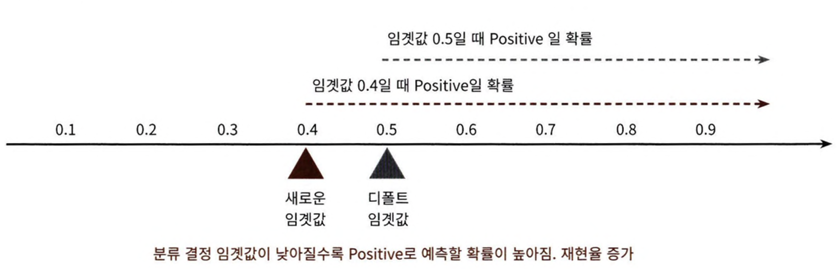

- Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐
- 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어듦

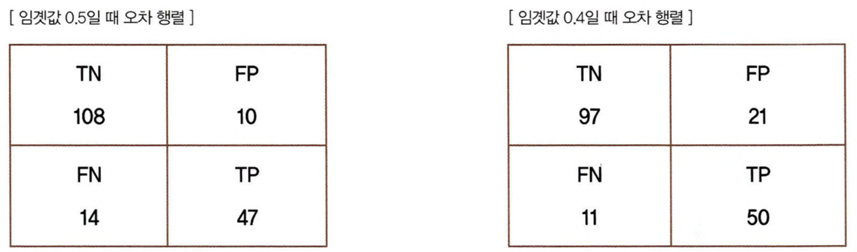

In [16]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    # thresholds list 객체 내의 값을 차례로 interaction 하면서 Evaluation 수행
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold = custom_threshold). fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


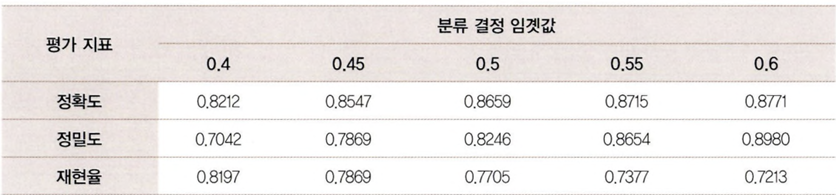

precision_recall_curve()

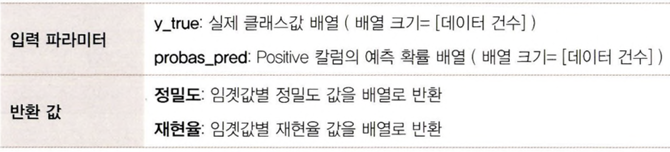

In [17]:
# precision_recall_curve() 를 이용해 타이타닉 에측 모델의 임곗값별 정밀도와 재현율 구하기

from sklearn.metrics import precision_recall_curve

# 레이브 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape :', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape : (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임곗값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐

precision_recall_curve() 는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는 데 이용 가능

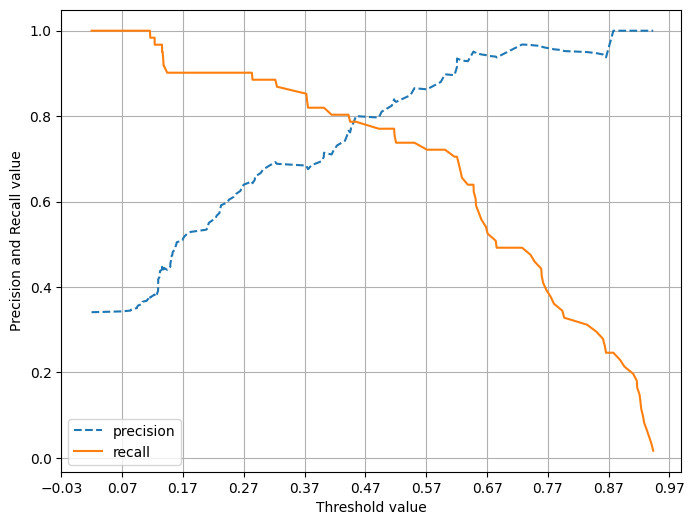

In [18]:
# precision_recall_curve() 를 이용해 정밀도의 재현율 곡선을 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarry 와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks (np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 정밀도는 점선, 재현율은 실선
- 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐

### [정밀도 재현율의 맹점]
- positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
- 정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법 : 그저 숫자 놀음에 불과함

1) 정밀도가 100%가 되는 방법
- 확실한 기준이 되는 경우만 Positive로 예측, 나머지는 모두 Negative로 예측

2) 재현율이 100%가 되는 방법
- 모든 환자를 Positive로 예측

### [04] F1 스코어
F1 스코어 : 정밀도와 재현율을 결합한 지표, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수칠르 나타낼 때 상대적으로 높은 값을 가짐

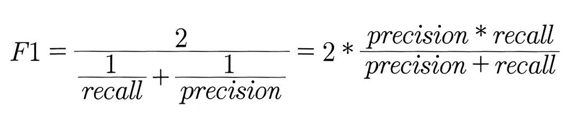

In [19]:
# f1_score()를 이용해 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어 구하기

from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'. format(f1))

F1 스코어 : 0.7966


In [20]:
# 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스커오 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'. format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율:0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율:0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율:0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율:0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율:0.7213, F1:0.8000


### [05] ROC 곡선과 AUC
- ROC 곡선(수신자 판단 곡선)과 AUC 스코어 : 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- ROC 곡선 : FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선

- TPR(재현율, 민감도) = TP / (FN + TP) : 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄
- TNR(특이성) = TN / (FP + TN) : 실제값 Negative(음성)가 정확히 예측돼야 하는 수준
- ROC 곡선의 X축 기준인 FPR(False Positive Rate) = FP / (FP + TN) : 1-TNR 또는 1-특이성

roc_curve() 를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값 구하기

In [21]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0] 은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


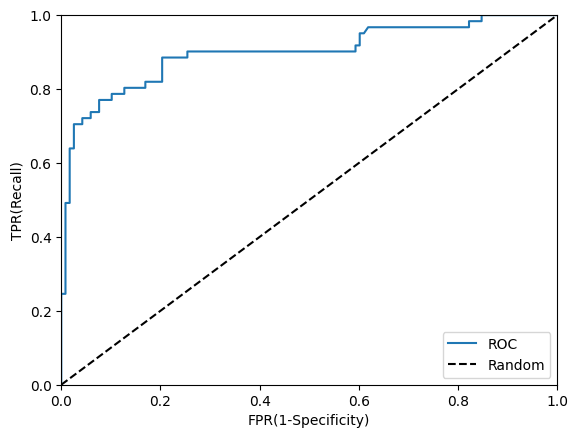

In [22]:
def roc_curve_plot(y_test, pred_proba_c1) :
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # Rco 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    # FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xlim(0,1) ; plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

- 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용
- 분류의 성능 지표로 사용되는 것 : ROC 곡선 면적에 기반한 AUC 값
- AUC(Area Under Curve) : ROC 곡선 밑의 면적을 구한 것, 일반적으로 1에 가까울수록 좋은 수치
- AUC 수치가 커지려면 : FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐
- 보통의 분류는 0.5 이상의 AUC 값을 가짐

In [23]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'. format(roc_score))

ROC AUC 값: 0.8987


get_clf_eval() 함수에 roc_auc_score()를 이용해 ROC AUC 값을 측정하는 로직을 추가, 정확도, 정밀도, 재현율, F1 스토어, ROC AUC 값을 출력

In [24]:
def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score (y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0: .4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\ F1: {3:.4f}, AUC:{4:.4f}'. format(accuracy, precision, recall, f1, roc_auc))

In [25]:
### [06] 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트


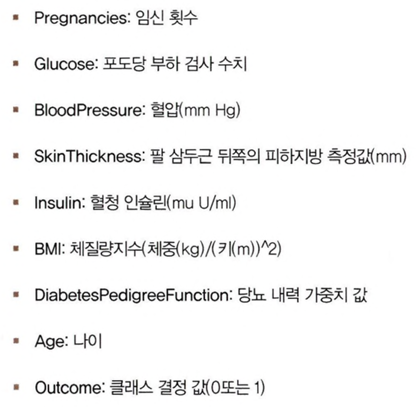

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("/content/drive/MyDrive/2024-2 ESAA/Data/diabetes.csv")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Negative 값 0이 500개 >> Positive 값 1dl 268개

In [27]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값이 없고 피처의 타입은 모두 숫자형

로지스틱 회귀를 이용해 예측 모델을 생성
- 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 나누고 학습 데이터 세트와 테스트 데이터 세트로 분리
- 로지스틱 회귀르 이용해 예측을 수행
- 앞 예제에서 사용한 유틸리티 함수인 get_clf_eval(), get_eval_by_threshold(), precision_recall_curve_plot()을 이용해 성능 평가 지표 출력, 재현율 곡선 시각화

In [28]:
# 피처 데이터 세트 x, 레이블 데이터 세트 우를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1 을 이용해 추출
X = diabetes_data.iloc[:, : -1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1 ]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도:  0.7727, 정밀도: 0.7111, 재현율: 0.5926,\ F1: 0.6465, AUC:0.8083


- 예측 정확도가 77.27$, 재현율은 59.26%
- 전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 조금 더 초점을 맞추기
- 먼저 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인하기

precision_recall_curve_plot() 함수를 이용

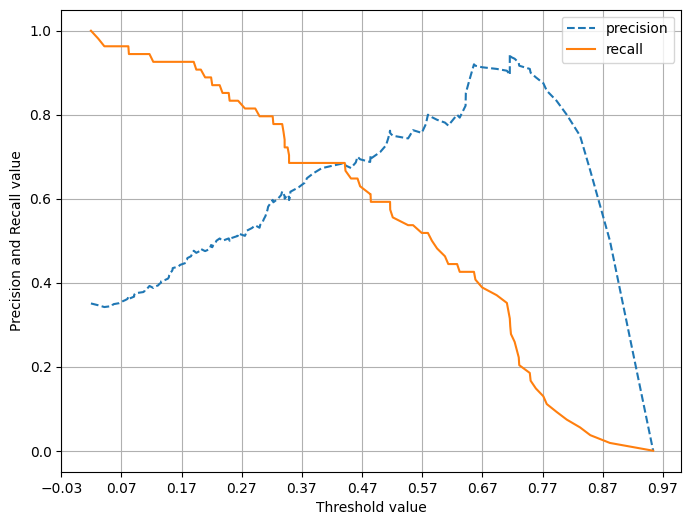

In [29]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느정도 균형을 맞출 것 같음
- 하지만 두 개의 지표 모두 0.7이 안 되는 수치를 보임
- 두 지표의 값이 낮음

임곗값을 인위적으로 조작하기 전 다시 데이터 값을 점검하기

In [30]:
# 원본 데이터의 피처 값의 분포도 살펴보기
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


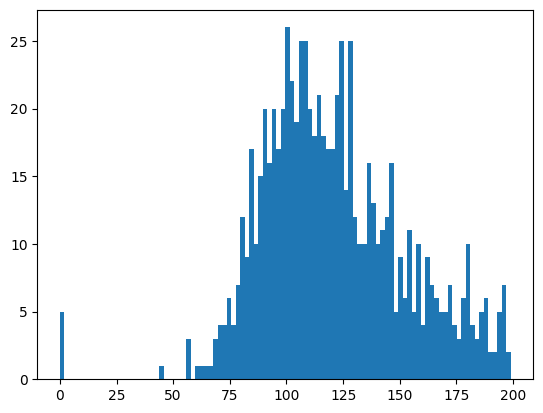

In [31]:
# Glucose 피처의 히스토그램을 통해 0 값의 존재 확인하기
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

min() 값이 0인 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는 지 확인

In [32]:
# 0 값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features :
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'. format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


- SkinThickness와 Insulin의 0 값은 각각 전체의 29.56%, 48.7%
- 전체 데이터 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우에는 학습을 효과적으로 수행하기 어려움
- 위 피처의 0 값을 평균값으로 대체하기

In [33]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환하기

In [34]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler. fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도:  0.7987, 정밀도: 0.7674, 재현율: 0.6111,\ F1: 0.6804, AUC:0.8433


- 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됨
- 그러나 재현율 수치는 개선이 필요해 보임

분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되는지 확인하기

In [36]:
# 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

In [37]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 내의 값을 차례로 iteration 하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [38]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도:  0.7143, 정밀도: 0.5658, 재현율: 0.7963,\ F1: 0.6615, AUC:0.8433
임계값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도:  0.7403, 정밀도: 0.6000, 재현율: 0.7778,\ F1: 0.6774, AUC:0.8433
임계값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도:  0.7468, 정밀도: 0.6190, 재현율: 0.7222,\ F1: 0.6667, AUC:0.8433
임계값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도:  0.7532, 정밀도: 0.6333, 재현율: 0.7037,\ F1: 0.6667, AUC:0.8433
임계값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도:  0.7792, 정밀도: 0.6923, 재현율: 0.6667,\ F1: 0.6792, AUC:0.8433
임계값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도:  0.7857, 정밀도: 0.7059, 재현율: 0.6667,\ F1: 0.6857, AUC:0.8433
임계값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도:  0.7987, 정밀도: 0.7447, 재현율: 0.6481,\ F1: 0.6931, AUC:0.8433
임계값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도:  0.7987, 정밀도: 0.7674, 재현율: 0.6111,\ F1: 0.6804, AUC:0.8433


앞에서 학습된 로지스틱 회귀 모델을 이용해 임곗값을 0.48로 낮춘 상태에서 다시 예측 해보기

In [39]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도:  0.7987, 정밀도: 0.7447, 재현율: 0.6481,\ F1: 0.6931, AUC:0.8433
